#### Loading Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries imported.")

Libraries imported.


#### Import Dataset

In [2]:
movie_data = pd.read_csv("movie_metadata.csv")
print("Dataset imported.")

Dataset imported.


#### Inspect Dataset

In [3]:
movie_data.head()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,1,Produk_1,Smartwatch,746.0,4.2,273.0,Japan
1,2,Produk_2,Headphone,241.0,3.5,239.0,Canada
2,3,Produk_3,Tablet,810.0,3.8,209.0,Canada
3,4,Produk_4,Headphone,303.0,3.2,59.0,South Korea
4,5,Produk_5,Headphone,252.0,3.7,76.0,South Korea


In [4]:
movie_data.tail(5)

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
545,546,Produk_546,Laptop,496.0,3.9,19.0,China
546,547,Produk_547,Headphone,628.0,4.7,414.0,USA
547,548,Produk_548,Tablet,465.0,4.3,393.0,India
548,549,Produk_549,Laptop,495.0,3.1,311.0,Germany
549,550,Produk_550,Tablet,388.0,4.3,240.0,Germany


In [5]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          520 non-null    float64
 4   rating         500 non-null    float64
 5   jumlah_ulasan  530 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


In [6]:
movie_data.describe()

,produk_id,harga,rating,jumlah_ulasan
count,550.000000,520.000000,500.000000,530.000000
mean,275.500000,565.715385,4.005600,259.671698
std,158.915596,625.886725,0.571052,142.655380
min,1.000000,-213.000000,3.000000,12.000000
25%,138.250000,374.000000,3.500000,139.000000
50%,275.500000,516.000000,4.000000,262.500000
75%,412.750000,656.250000,4.500000,390.750000
max,550.000000,8341.000000,5.000000,499.000000


#### Finding Missing Values

In [7]:
movie_data.isnull()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False


In [8]:
np.sum(movie_data.isnull(), axis=0)

produk_id         0
nama_produk       0
kategori          0
harga            30
rating           50
jumlah_ulasan    20
negara_asal       0
dtype: int64

Didapat beberapa missing value pada variabel harga, rating, dan jumlah_ulasan.

In [9]:
# Kalkulasi jumlah null value
movie_data.isnull().sum().sum()

100

#### Handling Missing Values

Jika terdapat missing value pada dataset yang tidak ditangani, proses analisis akan terhambat atau hasil analisis dapat mengalami skew atau bias yang mengakibatkan kesimpulan yang ditarik menjadi salah. <br/>
Beberapa algoritma analisis bahkan dapat memunculkan error jika terdapat nilai NA. Hal ini dapat menghambat proses analisis.

##### Variabel harga

In [10]:
np.sum(movie_data['harga'].isnull())

30

<Axes: xlabel='harga', ylabel='Count'>

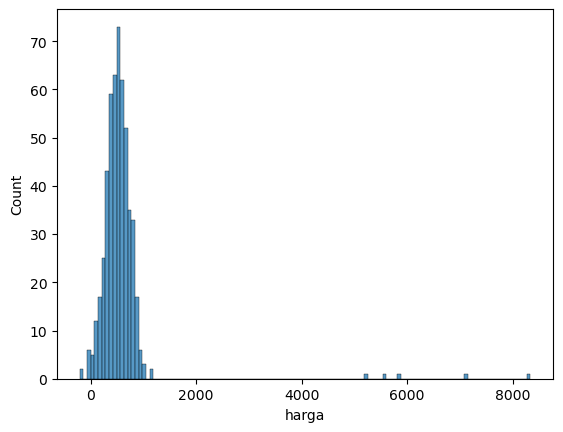

In [11]:
# Lihat grafik distribusi variabel harga
sns.histplot(movie_data['harga'])

Berdasarkan grafik di atas, distribusi variabel cenderung normal dengan beberapa outlier bernilai di atas 5000. <br/>
Karena adanya outlier, dapat disimpulkan bahwa metode pengisian nilai n.a. paling tepat adalah dengan median.

In [12]:
# Pengisian nilai n.a. dari variabel harga dengan metode median
movie_data['harga']=movie_data['harga'].fillna(movie_data['harga'].median())

In [13]:
# Cek missing value
np.sum(movie_data['harga'].isnull())

0

##### Variabel rating

In [14]:
np.sum(movie_data['rating'].isnull())

50

<Axes: xlabel='rating', ylabel='Count'>

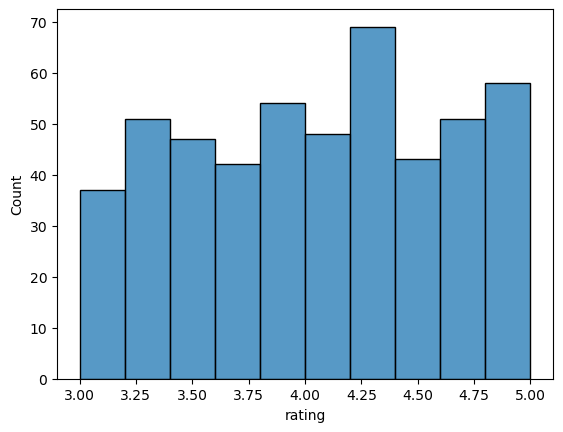

In [15]:
# Lihat grafik distribusi variabel rating
sns.histplot(movie_data['rating'])

Berdasarkan grafik di atas, distribusi variabel cenderung rata tanpa outlier. <br/>
Karena tidak adanya outlier dan tidak ada nilai yang mendominasi, maka dapat disimpulkan bahwa pengisian nilai n.a. baiknya menggunakan metode mean.

In [16]:
# Pengisian nilai n.a. dari variabel rating dengan metode mean
movie_data['rating']=movie_data['rating'].fillna(movie_data['rating'].mean())

In [17]:
# Cek missing value
np.sum(movie_data['harga'].isnull())

0

##### Variabel jumlah_ulasan

In [18]:
np.sum(movie_data['jumlah_ulasan'].isnull())

20

<Axes: xlabel='jumlah_ulasan', ylabel='Count'>

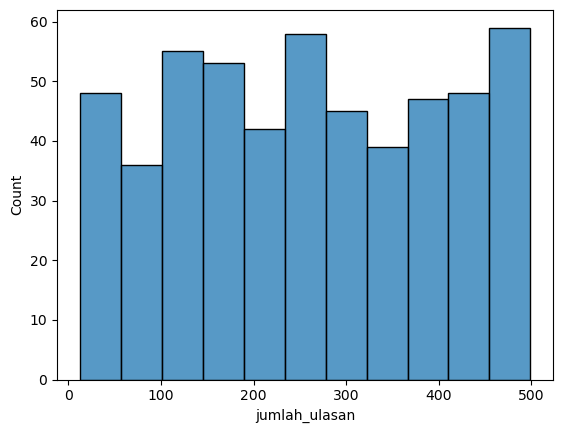

In [19]:
# Lihat grafik distribusi variabel jumlah_ulasan
sns.histplot(movie_data['jumlah_ulasan'])

Berdasarkan grafik di atas, distribusi variabel cenderung rata tanpa outlier. <br/>
Karena tidak adanya outlier dan tidak ada nilai yang mendominasi, maka dapat disimpulkan bahwa pengisian nilai n.a. baiknya menggunakan metode mean.

In [20]:
# Pengisian nilai n.a. dari variabel jumlah_ulasan dengan metode mean
movie_data['rating']=movie_data['rating'].fillna(movie_data['rating'].mean())

In [21]:
# Cek missing value
np.sum(movie_data['jumlah_ulasan'].isnull())

20

#### Finding Outliers

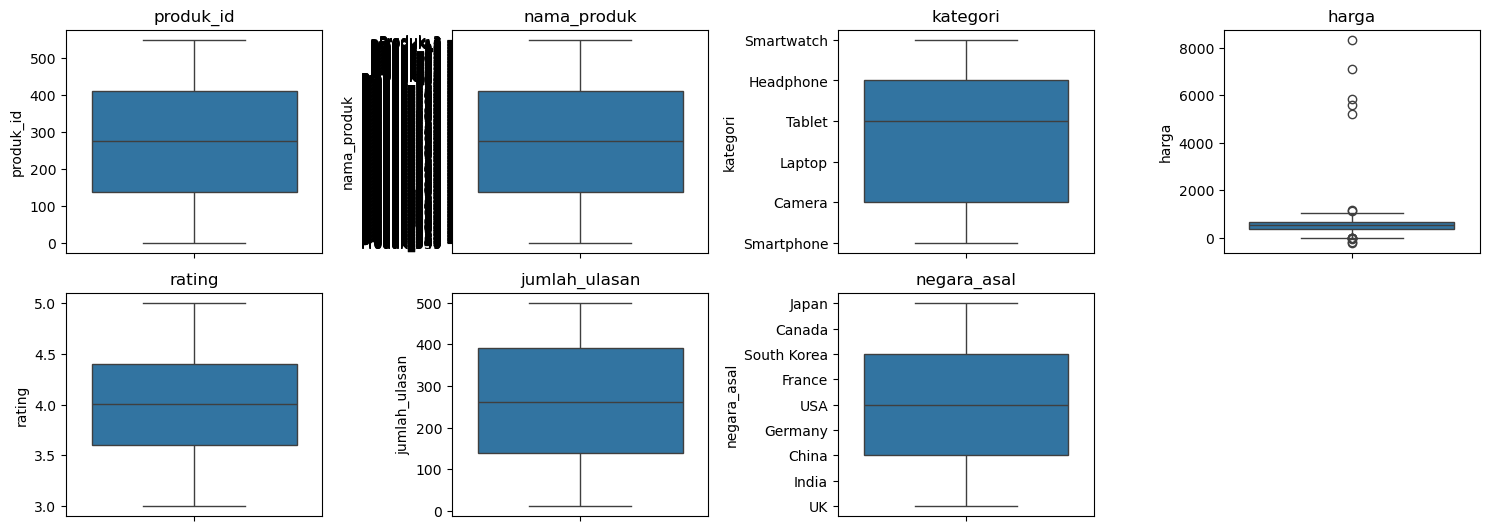

In [22]:
# Identifikasi outlier pada dataset dengan menggunakan boxplot
num_cols = [
    'produk_id',
    'nama_produk',
    'kategori',
    'harga',
    'rating',
    'jumlah_ulasan',
    'negara_asal'
]

plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=movie_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Berdasarkan boxplot di atas, didapat bahwa variabel harga memiliki outlier. <br/>
Keberadaan outlier dapat mendistorsi ukuran statistik dan mengganggu model prediktif yang digunakan pada analisis. <br/>
Di sisi lain, terkadang adanya outlier mengungkap fenomena unik yang perlu dianalisis lebih lanjut.

#### Handling Outliers

Pada variabel harga, terdapat outlier yang jauh di atas median dan jauh di bawah median. <br/>
Berdasarkan boxplot di atas, outlier nampak banyak dan terkumpul pada jangkauan tertentu dan tidak tersebar merata. <br/>
Kemungkinan outlier-outlier ini menunjukkan semacam pola sehingga sebaiknya tidak dihapus. <br/>
Maka, disimpulkan bahwa metode penanganan outlier yang tepat adalah winsorizing(mengganti outlier dengan batas IQR).

In [23]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing pada variabel/kolom harga
winsorize_iqr(movie_data, 'harga')

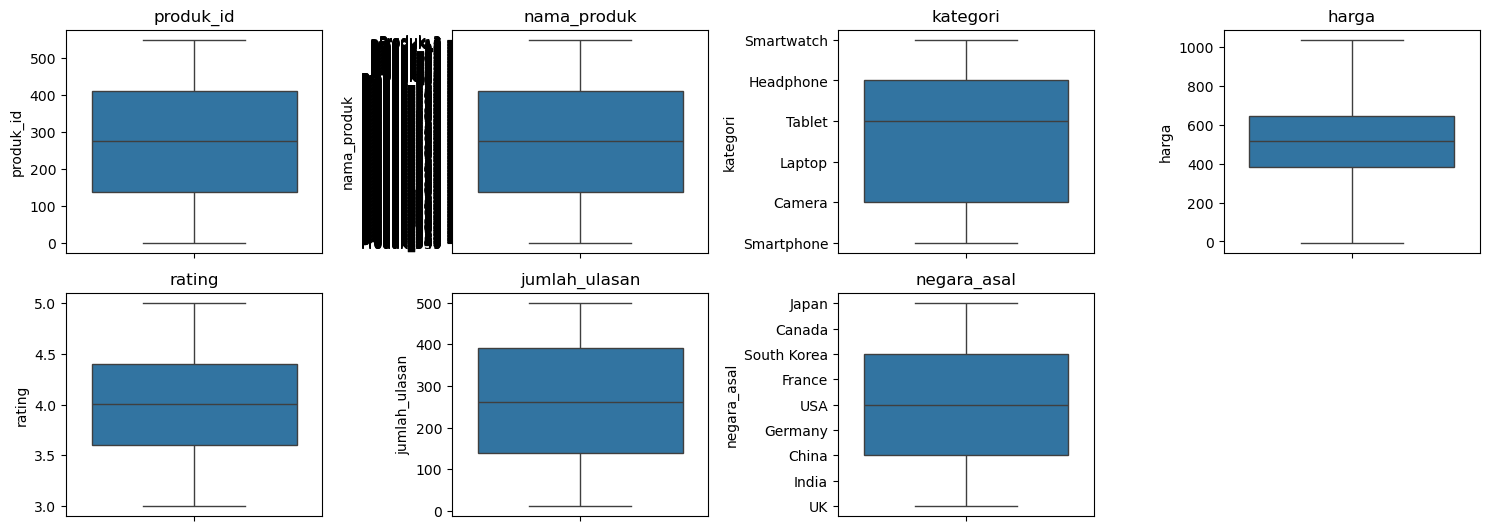

In [24]:
# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=movie_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#### Finding and Handling Categorical Variables

##### Identifikasi Variabel Kategorik

In [25]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          550 non-null    float64
 4   rating         550 non-null    float64
 5   jumlah_ulasan  530 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


Berdasarkan output di atas, didapat variabel nama_produk, kategori, dan negara_asal yang bukan merupakan tipe data angka. <br/>
Berikut akan dilakukan cek satu-persatu apakah variabel tersebut merupakan tipe kategorik atau bukan.

In [26]:
movie_data['nama_produk'].unique()

array(['Produk_1', 'Produk_2', 'Produk_3', 'Produk_4', 'Produk_5',
       'Produk_6', 'Produk_7', 'Produk_8', 'Produk_9', 'Produk_10',
       'Produk_11', 'Produk_12', 'Produk_13', 'Produk_14', 'Produk_15',
       'Produk_16', 'Produk_17', 'Produk_18', 'Produk_19', 'Produk_20',
       'Produk_21', 'Produk_22', 'Produk_23', 'Produk_24', 'Produk_25',
       'Produk_26', 'Produk_27', 'Produk_28', 'Produk_29', 'Produk_30',
       'Produk_31', 'Produk_32', 'Produk_33', 'Produk_34', 'Produk_35',
       'Produk_36', 'Produk_37', 'Produk_38', 'Produk_39', 'Produk_40',
       'Produk_41', 'Produk_42', 'Produk_43', 'Produk_44', 'Produk_45',
       'Produk_46', 'Produk_47', 'Produk_48', 'Produk_49', 'Produk_50',
       'Produk_51', 'Produk_52', 'Produk_53', 'Produk_54', 'Produk_55',
       'Produk_56', 'Produk_57', 'Produk_58', 'Produk_59', 'Produk_60',
       'Produk_61', 'Produk_62', 'Produk_63', 'Produk_64', 'Produk_65',
       'Produk_66', 'Produk_67', 'Produk_68', 'Produk_69', 'Produk_70',
 

Dapat disimpulkan bahwa variabel nama_produk bukanlah variabel kategorik. <br/>
Hal ini karena banyak produk sama dengan banyak baris pada dataset (550).

In [27]:
kat_unik = movie_data['kategori'].unique()
print(kat_unik)
print("Banyak kategori unik : " + str(np.count_nonzero(kat_unik)))

['Smartwatch' 'Headphone' 'Tablet' 'Laptop' 'Camera' 'Smartphone']
Banyak kategori unik : 6


Sama seperti pada boxplot, nampaknya variabel kategori memanglah variabel bertipe kategorik.

In [28]:
asal_unik = movie_data['negara_asal'].unique()
print(asal_unik)
print("Banyak kategori unik : " + str(np.count_nonzero(asal_unik)))

['Japan' 'Canada' 'South Korea' 'France' 'USA' 'Germany' 'China' 'India'
 'UK']
Banyak kategori unik : 9


Begitupun pada variabel negara_asal, yang juga merupakan variabel kategorik.

Jadi, dapat disimpulkan bahwa variabel kategori dan negara_asal perlu di-encoding.

##### Proses Encoding

Ordinal atau nominal :
- Variabel kategori jelas merupakan tipe nominal karena tidak terdapat hubungan bertingkat antar kategori. <br/>
- Variabel negara_asal juga bukan tipe ordinal, melainkan nominal karena tidak ada hubungan bertingkat antar negara.

Banyak kategori unik :
- Variabel kategori memiliki 6 kategori unik, maka penggunaan one-hot encoding masih memungkinkan karena tidak menghasilkan terlalu banyak variabel baru.
- Variabel negara_asal memiliki 9 kategori unik. Mungkin perlu dilakukan encoding non-ordinal yang menghasilkan variabel baru yang lebih sedikit dari one-hot encoding seperti binary encoding.

Karena belum dapat dibuktikan hubungan statistik yang kuat antara kategori dengan suatu variabel, maka penggunaan target encoding masih belum memungkinkan. <br/>

Jadi, dapat disimpulkan bahwa :
- Variabel kategori dapat di-encode menggunakan one-hot encoding.
- Variabel negara_asal dapat di-encode menggunakan binary encoding.

In [29]:
# One-hot encoding pada variabel kategori

movie_data_encoded = pd.get_dummies(movie_data, columns=['kategori'], prefix='kategori')
movie_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   produk_id            550 non-null    int64  
 1   nama_produk          550 non-null    object 
 2   harga                550 non-null    float64
 3   rating               550 non-null    float64
 4   jumlah_ulasan        530 non-null    float64
 5   negara_asal          550 non-null    object 
 6   kategori_Camera      550 non-null    bool   
 7   kategori_Headphone   550 non-null    bool   
 8   kategori_Laptop      550 non-null    bool   
 9   kategori_Smartphone  550 non-null    bool   
 10  kategori_Smartwatch  550 non-null    bool   
 11  kategori_Tablet      550 non-null    bool   
dtypes: bool(6), float64(3), int64(1), object(2)
memory usage: 29.1+ KB


In [30]:
# Binary encoding pada variabel negara_asal.

# install module category_encoders jika belum ada di sistem dengan asumsi adanya package anaconda.
import sys
try:
  import category_encoders
except:
  !conda install --yes --prefix {sys.prefix} category_encoders
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['negara_asal'])
movie_data_encoded = encoder.fit_transform(movie_data_encoded)
movie_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   produk_id            550 non-null    int64  
 1   nama_produk          550 non-null    object 
 2   harga                550 non-null    float64
 3   rating               550 non-null    float64
 4   jumlah_ulasan        530 non-null    float64
 5   negara_asal_0        550 non-null    int64  
 6   negara_asal_1        550 non-null    int64  
 7   negara_asal_2        550 non-null    int64  
 8   negara_asal_3        550 non-null    int64  
 9   kategori_Camera      550 non-null    bool   
 10  kategori_Headphone   550 non-null    bool   
 11  kategori_Laptop      550 non-null    bool   
 12  kategori_Smartphone  550 non-null    bool   
 13  kategori_Smartwatch  550 non-null    bool   
 14  kategori_Tablet      550 non-null    bool   
dtypes: bool(6), float64(3), int64(5), object

Didapat sebuah dataset baru dengan : 
- Variabel negara_asal ter-encode menjadi 4 variabel dan
- Variabel kategori ter-encode menjadi 6 variabel.

In [31]:
movie_data_encoded.head()

,produk_id,nama_produk,harga,rating,jumlah_ulasan,negara_asal_0,negara_asal_1,negara_asal_2,negara_asal_3,kategori_Camera,kategori_Headphone,kategori_Laptop,kategori_Smartphone,kategori_Smartwatch,kategori_Tablet
0,1,Produk_1,746.0,4.2,273.0,0,0,0,1,False,False,False,False,True,False
1,2,Produk_2,241.0,3.5,239.0,0,0,1,0,False,True,False,False,False,False
2,3,Produk_3,810.0,3.8,209.0,0,0,1,0,False,False,False,False,False,True
3,4,Produk_4,303.0,3.2,59.0,0,0,1,1,False,True,False,False,False,False
4,5,Produk_5,252.0,3.7,76.0,0,0,1,1,False,True,False,False,False,False
